<a href="https://colab.research.google.com/github/KY-39/platforma_udt/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

 # Анализ и обработка данных - д.з.


##Домашнее задание

Для выполнения задания потребуется датасет с Kaggle: https://www.kaggle.com/CooperUnion/cardataset

**Задание 1:** Загрузить датасет в таблицу Pandas. Переименовать столбцы так, чтобы было понятно по-русски, что в них содержится. Перевести числовые единицы в удобный нам формат из принятого за рубежом.

**Задание 2:** Вывести описательные характеристики датасета. Произвести его предварительную очистку: от дубликатов, пустых значений (допускается их чем-либо заполнить так, чтобы информация была правдоподобна), выбросов (используем стандартные подходы с квантилями).

**Задание 3:** Выведем на графиках: процент присутствия в датасете 10 наиболее популярных брендов, распределение числа машин в зависимости от года выпуска, распределение количества авто по типу трансмиссии.

**Задание 4:** Переводим в категориальные те признаки, котрые не являются числовыми (пока не используем OHE). Заносим эти признаки в копию таблицы.

**Задание 5:** Cтроим матрицу корреляции.

**Задание 6:** Нормализуем признаки. Заносим в копию таблицы. Cтроим матрицу корреляции после нормализации.

**Задание 7:** Cтроим для коррелирующих с метками характеристик отдельные графики, проводим анализ, как можно обработать данные. 

**Задание 8:** Построим парные взаимосвязи. Делаем дополнительные выводы о корреляции данных. (Подсказка: лучше брать исходно числовые колонки.)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import utils
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Задание 1:** Загрузить датасет в таблицу Pandas. Переименовать столбцы так, чтобы было понятно по-русски, что в них содержится. Перевести числовые единицы в удобный нам формат из принятого за рубежом. 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/car_features.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
df.columns.tolist()

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [ ]:
df = df.rename(columns={'Make':'Марка',
                      'Model':'Модель',
                      'Year':'Год_выпуска',
                      'Engine Fuel Type':'Тип_топлива', 
                      'Engine HP':'Мощность_ДВС(л.с.)',
                      'Engine Cylinders':'Число_цилиндров',
                      'Transmission Type':'Тип_трансмиссии',
                      'Driven_Wheels':'Привод',
                      'Number of Doors':'Количество_дверей',
                      'Market Category':'Рыночная_категория', 
                      'Vehicle Size':'Размер_кузова',
                      'Vehicle Style':'Тип_кузова',
                      'highway MPG':'Расход_трасса',
                      'city mpg':'Расход_город',
                      'Popularity':'Популярность',
                      'MSRP':'Цена'})

In [ ]:
df[['Расход_трасса', 'Расход_город']] = round(100 * 3.785 / (df[['Расход_трасса', 'Расход_город']] * 1.609), 1)
df.head()

,Марка,Модель,Год_выпуска,Тип_топлива,Мощность_ДВС(л.с.),Число_цилиндров,Тип_трансмиссии,Привод,Количество_дверей,Рыночная_категория,Размер_кузова,Тип_кузова,Расход_трасса,Расход_город,Популярность,Цена
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,9.0,12.4,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,8.4,12.4,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,8.4,11.8,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,8.4,13.1,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,8.4,13.1,3916,34500


###**Задание 2:** Вывести описательные характеристики датасета. Произвести его предварительную очистку: от дубликатов, пустых значений (допускается их чем-либо заполнить так, чтобы информация была правдоподобна), выбросов (используем стандартные подходы с квантилями).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Марка               11914 non-null  object 
 1   Модель              11914 non-null  object 
 2   Год_выпуска         11914 non-null  int64  
 3   Тип_топлива         11911 non-null  object 
 4   Мощность_ДВС(л.с.)  11845 non-null  float64
 5   Число_цилиндров     11884 non-null  float64
 6   Тип_трансмиссии     11914 non-null  object 
 7   Привод              11914 non-null  object 
 8   Количество_дверей   11908 non-null  float64
 9   Рыночная_категория  8172 non-null   object 
 10  Размер_кузова       11914 non-null  object 
 11  Тип_кузова          11914 non-null  object 
 12  Расход_трасса       11914 non-null  float64
 13  Расход_город        11914 non-null  float64
 14  Популярность        11914 non-null  int64  
 15  Цена                11914 non-null  int64  
dtypes: f

In [ ]:
df.drop(['Рыночная_категория'], axis=1, inplace=True)
df.duplicated().sum()

720

In [ ]:
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11194 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Марка               11194 non-null  object 
 1   Модель              11194 non-null  object 
 2   Год_выпуска         11194 non-null  int64  
 3   Тип_топлива         11191 non-null  object 
 4   Мощность_ДВС(л.с.)  11125 non-null  float64
 5   Число_цилиндров     11164 non-null  float64
 6   Тип_трансмиссии     11194 non-null  object 
 7   Привод              11194 non-null  object 
 8   Количество_дверей   11188 non-null  float64
 9   Размер_кузова       11194 non-null  object 
 10  Тип_кузова          11194 non-null  object 
 11  Расход_трасса       11194 non-null  float64
 12  Расход_город        11194 non-null  float64
 13  Популярность        11194 non-null  int64  
 14  Цена                11194 non-null  int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 1.4+

In [ ]:
df.dropna(inplace=True, axis=0)
df.isnull().sum()

Марка                 0
Модель                0
Год_выпуска           0
Тип_топлива           0
Мощность_ДВС(л.с.)    0
Число_цилиндров       0
Тип_трансмиссии       0
Привод                0
Количество_дверей     0
Размер_кузова         0
Тип_кузова            0
Расход_трасса         0
Расход_город          0
Популярность          0
Цена                  0
dtype: int64

In [ ]:
df.describe()

,Год_выпуска,Мощность_ДВС(л.с.),Число_цилиндров,Количество_дверей,Расход_трасса,Расход_город,Популярность,Цена
count,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,1.109200e+04
mean,2010.693833,253.528579,5.687973,3.450415,9.502921,13.155806,1556.681302,4.190853e+04
std,7.241249,110.184621,1.766331,0.874700,2.312054,3.432555,1443.586149,6.174305e+04
min,1990.000000,55.000000,0.000000,2.000000,0.700000,1.700000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,7.800000,10.700000,549.000000,2.153750e+04
50%,2015.000000,240.000000,6.000000,4.000000,9.400000,13.100000,1385.000000,3.059750e+04
75%,2016.000000,303.000000,6.000000,4.000000,10.700000,14.700000,2009.000000,4.302250e+04
max,2017.000000,1001.000000,16.000000,4.000000,19.600000,33.600000,5657.000000,2.065902e+06


In [ ]:
df[df.Число_цилиндров == 0].Модель.unique()

array(['B-Class Electric Drive', 'i3', 'Spark EV'], dtype=object)

In [ ]:
df[df.Цена > 5e+5].Модель.unique()

array(['62', 'Aventador', 'Enzo', 'Landaulet', 'Reventon', 'Veyron 16.4'],
      dtype=object)

In [ ]:
df[df.Модель == '62']

,Марка,Модель,Год_выпуска,Тип_топлива,Мощность_ДВС(л.с.),Число_цилиндров,Тип_трансмиссии,Привод,Количество_дверей,Размер_кузова,Тип_кузова,Расход_трасса,Расход_город,Популярность,Цена
696,Maybach,62,2010,premium unleaded (required),604.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,14.7,23.5,67,456500
697,Maybach,62,2010,premium unleaded (required),543.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,14.7,23.5,67,417000
698,Maybach,62,2010,premium unleaded (required),631.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,14.7,23.5,67,506500
699,Maybach,62,2011,premium unleaded (required),543.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,14.7,23.5,67,423500
700,Maybach,62,2011,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,14.7,23.5,67,463000
701,Maybach,62,2012,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,14.7,23.5,67,470350
702,Maybach,62,2012,premium unleaded (required),543.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,14.7,23.5,67,430450


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Год_выпуска               9.0
Мощность_ДВС(л.с.)      131.0
Число_цилиндров           2.0
Количество_дверей         2.0
Расход_трасса             2.9
Расход_город              4.0
Популярность           1460.0
Цена                  21485.0
dtype: float64

In [ ]:
df = df[~((df < (Q1 - 1.5*IQR))|(df > (Q3 + 1.5*IQR))).any(axis = 1)]
df.shape

(8720, 15)

###**Задание 3:** Выведем на графиках: процент присутствия в датасете 10 наиболее популярных брендов, распределение числа машин в зависимости от года выпуска, распределение количества авто по типу трансмиссии.

In [ ]:
percentage = df.Марка.value_counts() * 100/df.shape[0]

fig = go.Figure(data=[go.Bar(x=percentage[:10], y=percentage.index[:10], orientation='h')])

fig.update_layout(title_text='Наиболее популярные бренды',
                  xaxis_title='Процент присутствия',
                  yaxis_title='Марка авто')

In [ ]:
min = df.Год_выпуска.min()
inrange = range(df.Год_выпуска.max() - min+1)
counts = [sum(df.Год_выпуска==min+i) for i in inrange]

fig = go.Figure([go.Bar(x=[min+i for i in inrange], y=counts)])

fig.update_layout(title='Распределение числа машин в зависимости от года выпуска',
                  xaxis_title='Год выпуска',
                  yaxis_title='Количество проданных авто')

In [ ]:
data = df.Тип_трансмиссии.value_counts()

fig = go.Figure(data=[go.Pie(labels=data.index, values=data.tolist(), textinfo='label+percent')])
fig.update_traces(hole=.5)

###**Задание 4:** Переводим в категориальные те признаки, котрые не являются числовыми (пока не используем OHE). Заносим эти признаки в копию таблицы.

In [ ]:
objects = df.select_dtypes(include=['object']).columns.tolist()
objects

['Марка',
 'Модель',
 'Тип_топлива',
 'Тип_трансмиссии',
 'Привод',
 'Размер_кузова',
 'Тип_кузова']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df12 = df

for feature in objects:
  le.fit(df[feature])
  df12[feature]=le.transform(df[feature])

df12

,Марка,Модель,Год_выпуска,Тип_топлива,Мощность_ДВС(л.с.),Число_цилиндров,Тип_трансмиссии,Привод,Количество_дверей,Размер_кузова,Тип_кузова,Расход_трасса,Расход_город,Популярность,Цена
0,3,1,2011,6,335.0,6.0,3,3,2.0,0,8,9.0,12.4,3916,46135
1,3,0,2011,6,300.0,6.0,3,3,2.0,0,6,8.4,12.4,3916,40650
2,3,0,2011,6,300.0,6.0,3,3,2.0,0,8,8.4,11.8,3916,36350
3,3,0,2011,6,230.0,6.0,3,3,2.0,0,8,8.4,13.1,3916,29450
4,3,0,2011,6,230.0,6.0,3,3,2.0,0,6,8.4,13.1,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,647,2012,6,300.0,6.0,1,0,4.0,2,2,10.2,14.7,204,46120
11910,0,647,2012,6,300.0,6.0,1,0,4.0,2,2,10.2,14.7,204,56670
11911,0,647,2012,6,300.0,6.0,1,0,4.0,2,2,10.2,14.7,204,50620
11912,0,647,2013,5,300.0,6.0,1,0,4.0,2,2,10.2,14.7,204,50920


In [ ]:
df12 = df12.astype('float64')
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Марка               8720 non-null   float64
 1   Модель              8720 non-null   float64
 2   Год_выпуска         8720 non-null   float64
 3   Тип_топлива         8720 non-null   float64
 4   Мощность_ДВС(л.с.)  8720 non-null   float64
 5   Число_цилиндров     8720 non-null   float64
 6   Тип_трансмиссии     8720 non-null   float64
 7   Привод              8720 non-null   float64
 8   Количество_дверей   8720 non-null   float64
 9   Размер_кузова       8720 non-null   float64
 10  Тип_кузова          8720 non-null   float64
 11  Расход_трасса       8720 non-null   float64
 12  Расход_город        8720 non-null   float64
 13  Популярность        8720 non-null   float64
 14  Цена                8720 non-null   float64
dtypes: float64(15)
memory usage: 1.1 MB


###**Задание 5:** Cтроим матрицу корреляции.

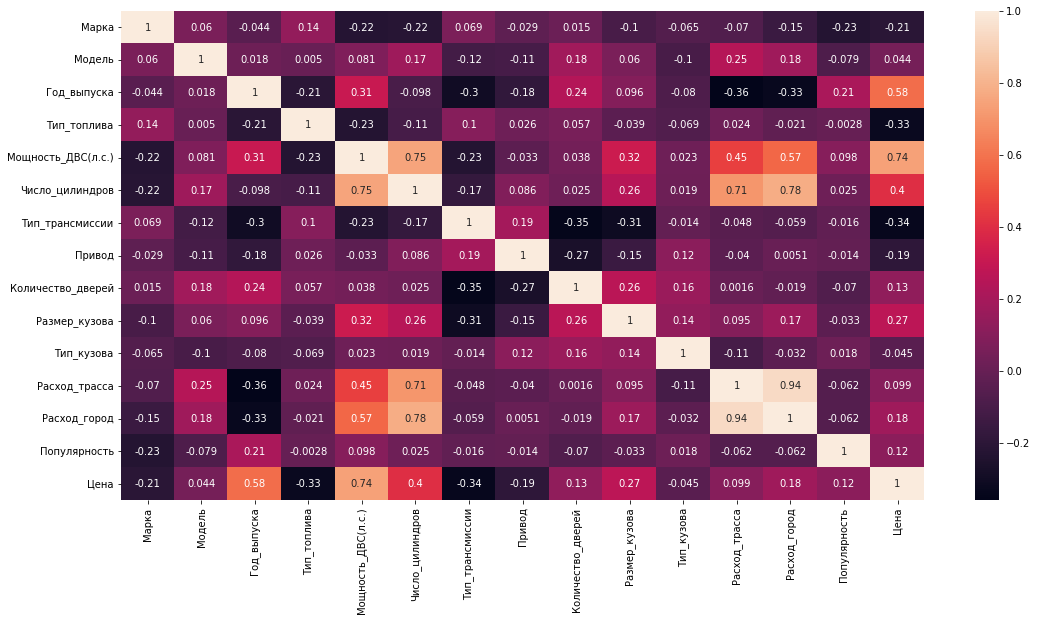

In [ ]:
df_corr = df12.corr()

f, ax = plt.subplots(figsize=(18,9))
sns.heatmap(df_corr, annot=True)
plt.show()

###**Задание 6:** Нормализуем признаки. Заносим в копию таблицы. Cтроим матрицу корреляции после нормализации.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df12)
df2 = scaler.transform(df12)
df2

array([[0.08333333, 0.00152207, 0.73913043, ..., 0.51677852, 1.        ,
        0.60293716],
       [0.08333333, 0.        , 0.73913043, ..., 0.51677852, 1.        ,
        0.52800546],
       [0.08333333, 0.        , 0.73913043, ..., 0.47651007, 1.        ,
        0.4692623 ],
       ...,
       [0.        , 0.9847793 , 0.7826087 , ..., 0.67114094, 0.04698331,
        0.66420765],
       [0.        , 0.9847793 , 0.82608696, ..., 0.67114094, 0.04698331,
        0.66830601],
       [0.52777778, 0.98630137, 0.52173913, ..., 0.61073826, 0.01026958,
        0.36878415]])

In [ ]:
df22 = pd.DataFrame(data=df2, columns=df12.columns.tolist())
df22

,Марка,Модель,Год_выпуска,Тип_топлива,Мощность_ДВС(л.с.),Число_цилиндров,Тип_трансмиссии,Привод,Количество_дверей,Размер_кузова,Тип_кузова,Расход_трасса,Расход_город,Популярность,Цена
0,0.083333,0.001522,0.739130,0.857143,0.651163,0.6,0.75,1.000000,0.0,0.0,0.533333,0.418367,0.516779,1.000000,0.602937
1,0.083333,0.000000,0.739130,0.857143,0.569767,0.6,0.75,1.000000,0.0,0.0,0.400000,0.357143,0.516779,1.000000,0.528005
2,0.083333,0.000000,0.739130,0.857143,0.569767,0.6,0.75,1.000000,0.0,0.0,0.533333,0.357143,0.476510,1.000000,0.469262
3,0.083333,0.000000,0.739130,0.857143,0.406977,0.6,0.75,1.000000,0.0,0.0,0.533333,0.357143,0.563758,1.000000,0.375000
4,0.083333,0.000000,0.739130,0.857143,0.406977,0.6,0.75,1.000000,0.0,0.0,0.400000,0.357143,0.563758,1.000000,0.443989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,0.000000,0.984779,0.782609,0.857143,0.569767,0.6,0.25,0.000000,1.0,1.0,0.133333,0.540816,0.671141,0.046983,0.602732
8716,0.000000,0.984779,0.782609,0.857143,0.569767,0.6,0.25,0.000000,1.0,1.0,0.133333,0.540816,0.671141,0.046983,0.746858
8717,0.000000,0.984779,0.782609,0.857143,0.569767,0.6,0.25,0.000000,1.0,1.0,0.133333,0.540816,0.671141,0.046983,0.664208
8718,0.000000,0.984779,0.826087,0.714286,0.569767,0.6,0.25,0.000000,1.0,1.0,0.133333,0.540816,0.671141,0.046983,0.668306


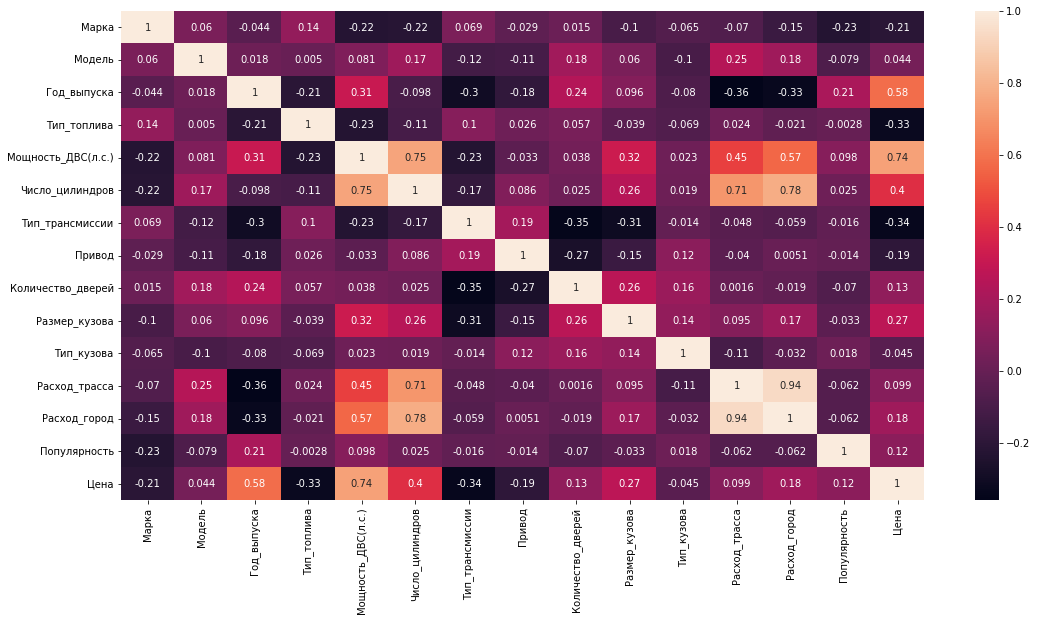

In [ ]:
df_corr = df22.corr()

f, ax = plt.subplots(figsize=(18,9))
sns.heatmap(df_corr, annot=True)
plt.show()

###**Задание 7:** Cтроим для коррелирующих с метками характеристик отдельные графики, проводим анализ, как можно обработать данные. 

In [ ]:
def sc_plot(target):
  f, ax = plt.subplots(figsize=(12,8))
  ax.scatter(df[target], df.Цена)
  ax.set_xlabel(' '.join(target.split('_')))
  ax.set_ylabel('Цена')
  plt.show()

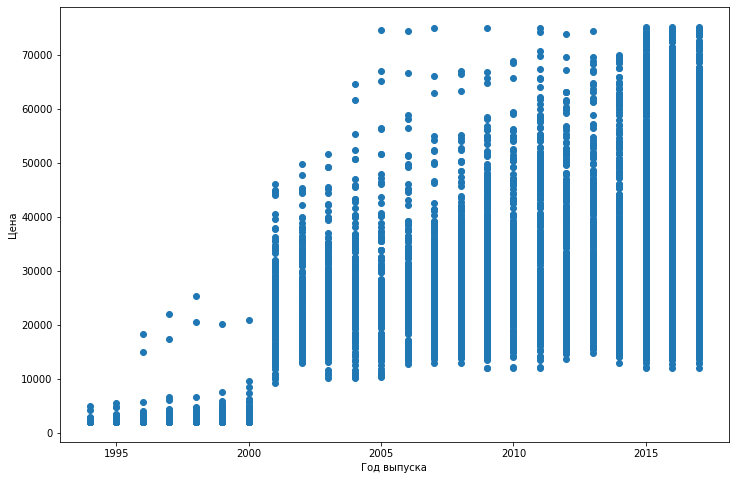

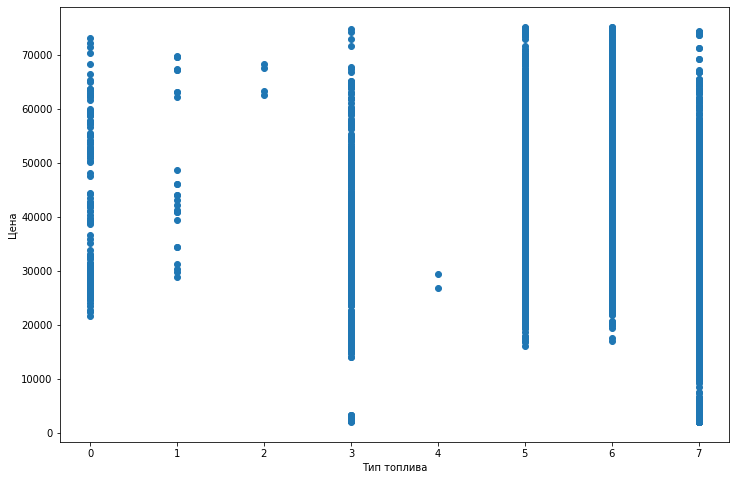

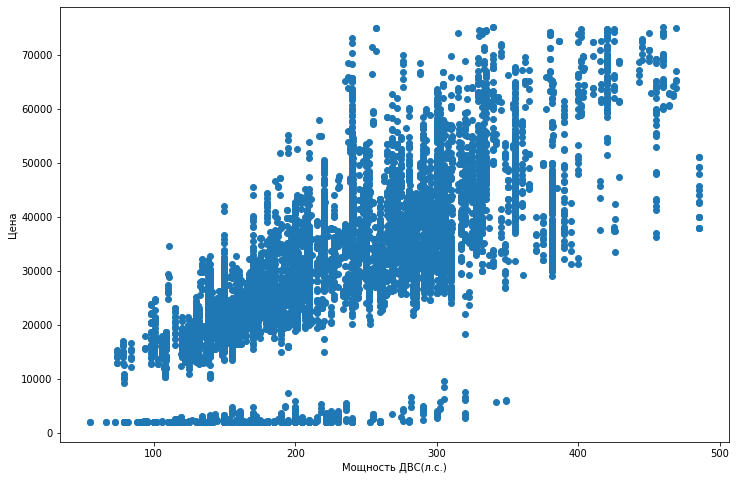

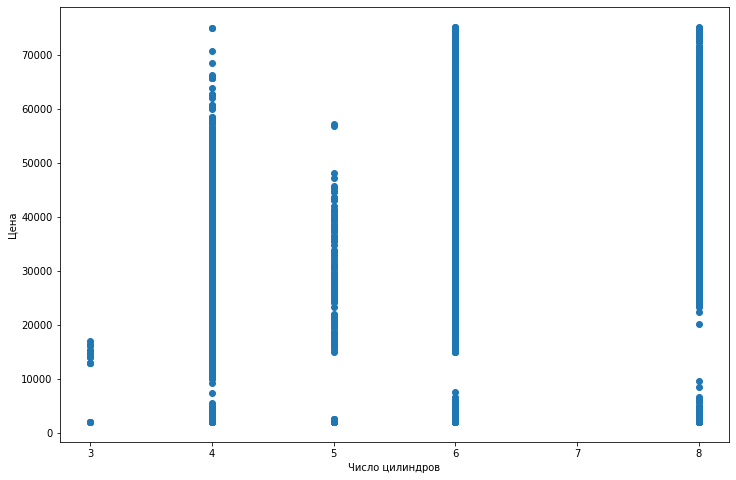

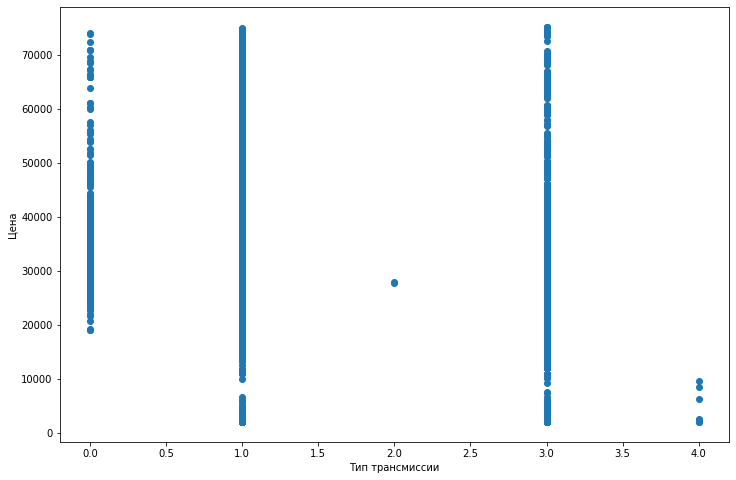

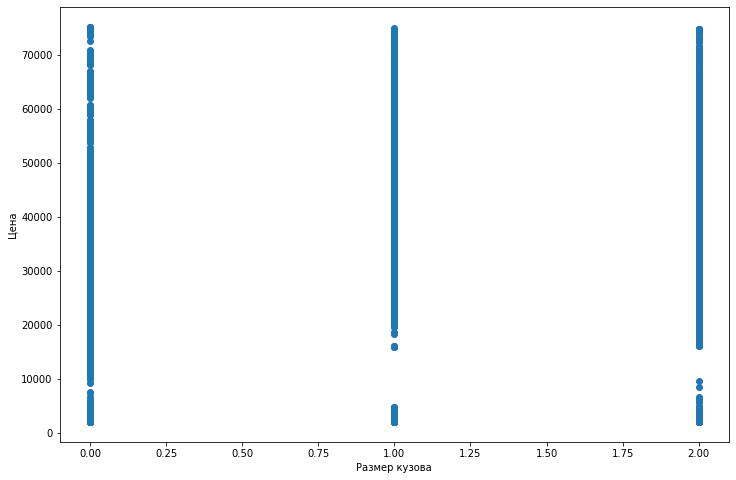

In [ ]:
top = df_corr[abs(df_corr.Цена) > .25].index.tolist()

for i in top[:-1]:
  sc_plot(i)

Год выпуска и мощность двигателя напрашиваются на разделение по классам. А размер кузова можно выкинуть как шумовой признк.

###**Задание 8:** Построим парные взаимосвязи. Делаем дополнительные выводы о корреляции данных. (Подсказка: лучше брать исходно числовые колонки.)

In [ ]:
df3 = df22.drop(objects, axis=1)
df3.head()

,Год_выпуска,Мощность_ДВС(л.с.),Число_цилиндров,Количество_дверей,Расход_трасса,Расход_город,Популярность,Цена
0,0.73913,0.651163,0.6,0.0,0.418367,0.516779,1.0,0.602937
1,0.73913,0.569767,0.6,0.0,0.357143,0.516779,1.0,0.528005
2,0.73913,0.569767,0.6,0.0,0.357143,0.476510,1.0,0.469262
3,0.73913,0.406977,0.6,0.0,0.357143,0.563758,1.0,0.375000
4,0.73913,0.406977,0.6,0.0,0.357143,0.563758,1.0,0.443989


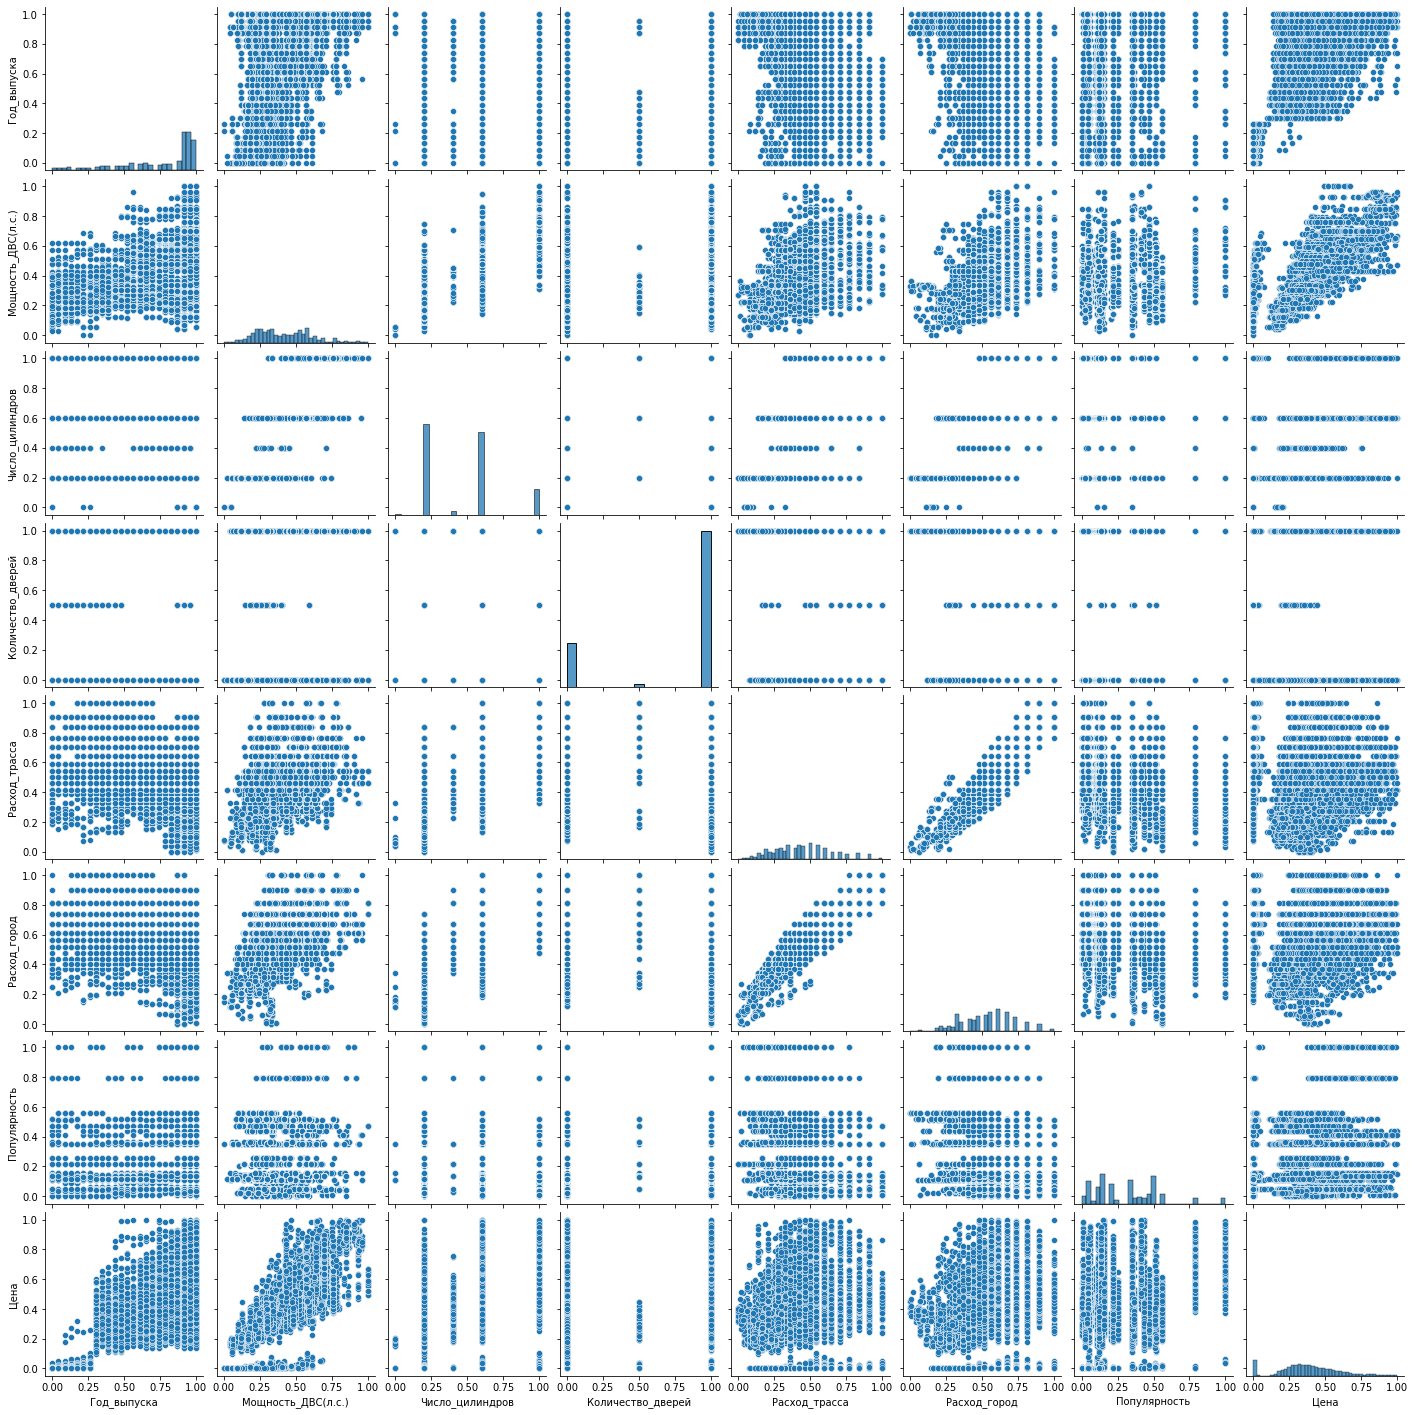

In [ ]:
sns.pairplot(df3)

Достаточно отчетливо прослеживается отдельный класс дешевых автомобилей, возможно это связано с наличием дефектов у некоторых машин.

# Литература

1. https://python-school.ru/sqlite-database-and-pandas/

2. https://fooobar.com/questions/152438/convert-categorical-data-in-pandas-dataframe

3. https://ru.stackoverflow.com/questions/798664/%D0%9A%D0%B0%D0%BA-%D1%80%D0%B0%D1%81%D0%BF%D0%B0%D1%80%D1%81%D0%B8%D1%82%D1%8C-%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B9-%D1%84%D0%B0%D0%B9%D0%BB-%D1%81-%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D1%81%D1%82%D1%80%D0%BE%D1%87%D0%BD%D0%BE%D0%B9-%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%82%D1%83%D1%80%D0%BE%D0%B9-%D0%B2-dataframe

4. https://dfedorov.spb.ru/pandas/%D0%A0%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE%20%D0%BF%D0%BE%20%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E%20%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85%20%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B9%20%D0%B2%20Python.html

5. https://stackoverflow.com/questions/47127388/converting-a-pandas-dataframe-column-into-one-hot-labels

6. https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

7. https://habr.com/ru/post/456294/

8. https://gist.github.com/ramhiser/982ce339d5f8c9a769a0

9. https://stackoverflow.com/questions/43601217/how-to-convert-a-data-frame-to-one-hot-encoded

10. https://dev-gang.ru/article/kak-perebirat-stroki-v-freime-dannyh-pandas-6kv1i4ayi8/

11. https://www.machinelearningmastery.ru/python-data-preprocessing-using-pandas-dataframe-spark-dataframe-and-koalas-dataframe-e44c42258a8f/

12. https://khashtamov.com/ru/pandas-introduction/

